In [1]:
import pandas as pd

results_file = "train_set_clean.dat.ff.final.json.result" #"../../model_batch_nr_5000.json.not_sampled.result"
label_file = "labels_sampled.txt" #"july_week_5_test.dat.labels.txt"

background_label = "0"

results_df = pd.read_csv(results_file, delimiter=";")
results_df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""1 20 2466900 1766900 1773900 1773900 1773900...",[-1],[-7.40168],-7.40168,-7.40168,-7.40168
1,1,"""1 20 3182300 3182300 3182300 3181600 3181600...",[-1],[-9.40249],-9.40249,-9.40249,-9.40249
2,1,"""1 20 3181600 2481600 2481600 2481600 2481600...",[-1],[-5.63397],-5.63397,-5.63397,-5.63397
3,1,"""1 20 2481600 2481600 2481600 2481600 2481600...",[-1],[-5.8749],-5.87490,-5.87490,-5.87490
4,1,"""1 20 3252300 3252300 3252300 3252300 3322300...",[-1],[-6.36908],-6.36908,-6.36908,-6.36908
...,...,...,...,...,...,...,...
1331646,1,"""1 1 5399900""",[-1],[-2.83193],-2.83193,-2.83193,-2.83193
1331647,1,"""1 1 5399900""",[-1],[-2.83193],-2.83193,-2.83193,-2.83193
1331648,1,"""1 1 5399900""",[-1],[-2.83193],-2.83193,-2.83193,-2.83193
1331649,1,"""1 1 5392200""",[-1],[-7.85703],-7.85703,-7.85703,-7.85703


In [2]:
mean_scores = results_df[" mean scores"]
min_scores = results_df[" min score"]

del results_df

In [3]:
import numpy as np

labels = list()
for line in open(label_file, "rt"):
    if line.split()[-1] != background_label:
        labels.append(1)
    else:
        labels.append(0)
        
labels = np.array(labels)
np.unique(labels, return_counts=True)

(array([0, 1]), array([1231527,  100124]))

In [4]:
len(labels), len(mean_scores)

(1331651, 1331651)

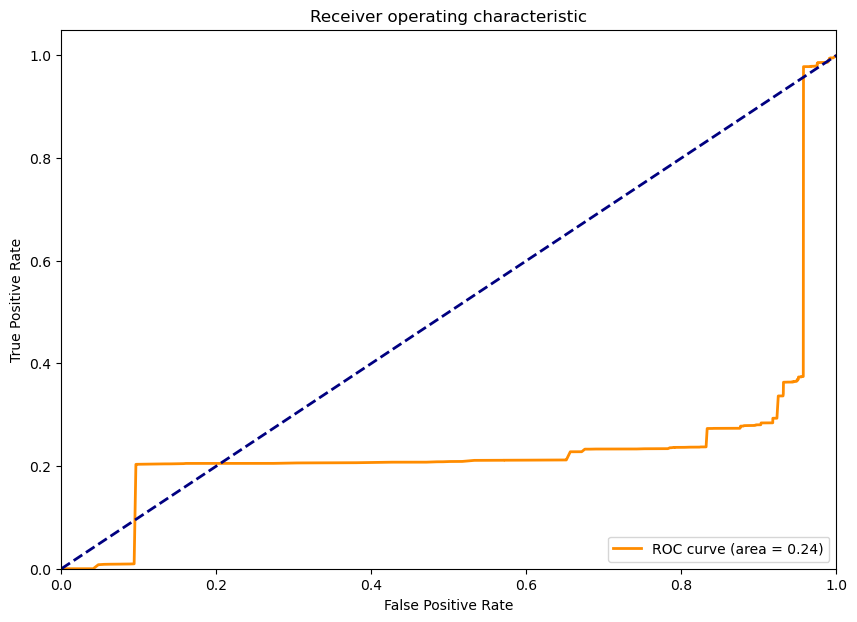

In [5]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

score = -mean_scores

fpr, tpr, thresholds = roc_curve(labels, score)
roc_auc = roc_auc_score(labels, score)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")

# Do the CSS files, check per input

Batch nr  1000
Len res_df:  1331651
Plotting


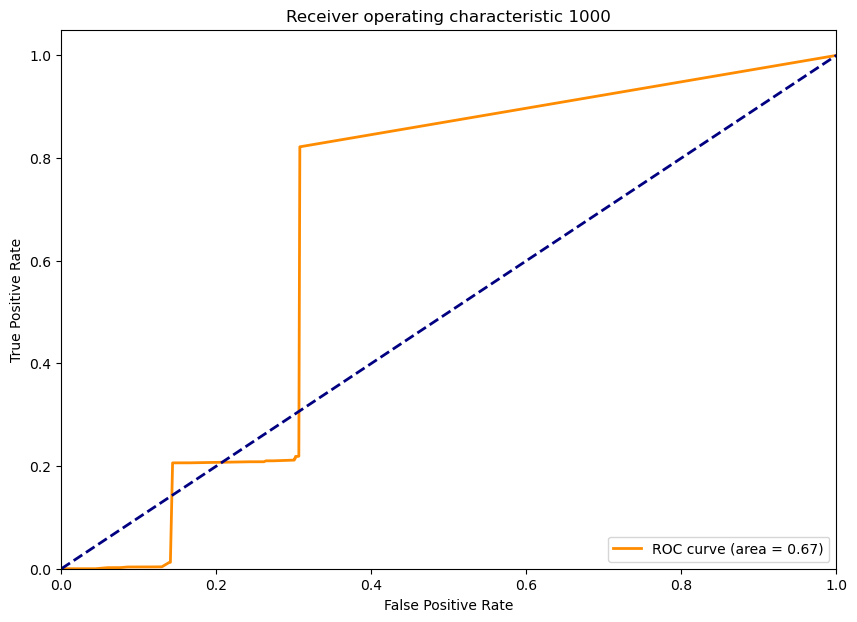

Batch nr  2000
Len res_df:  1331651
Plotting


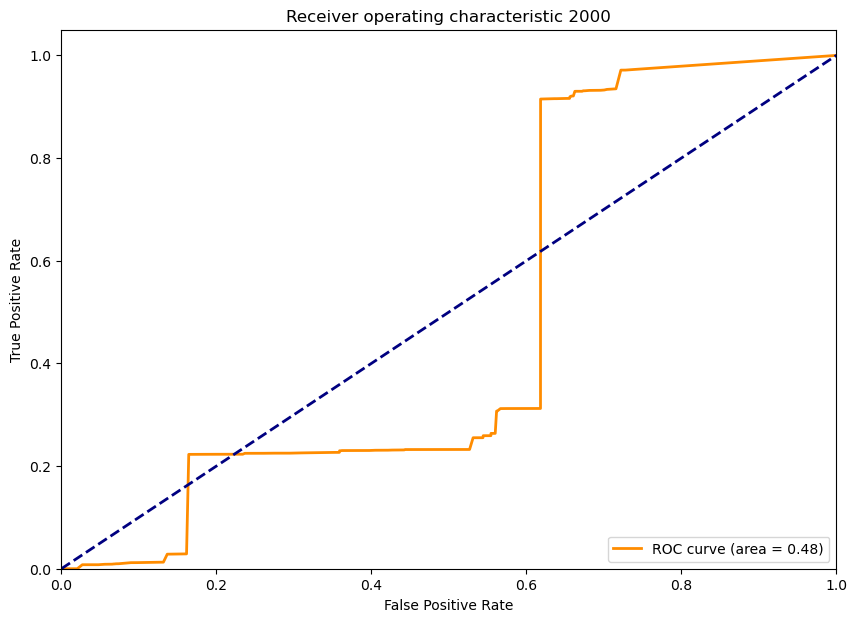

Batch nr  3000
Len res_df:  1331651
Plotting


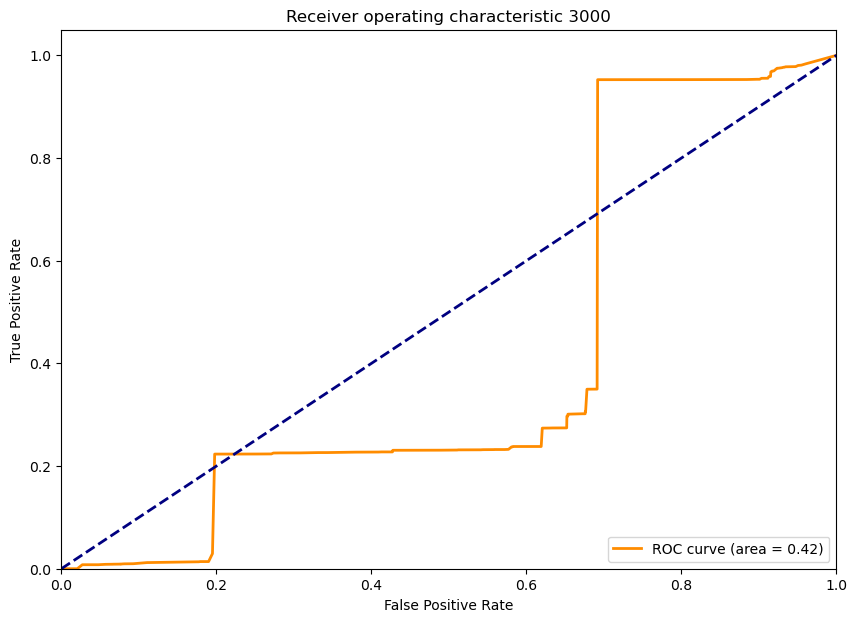

Batch nr  4000
Len res_df:  1331651
Plotting


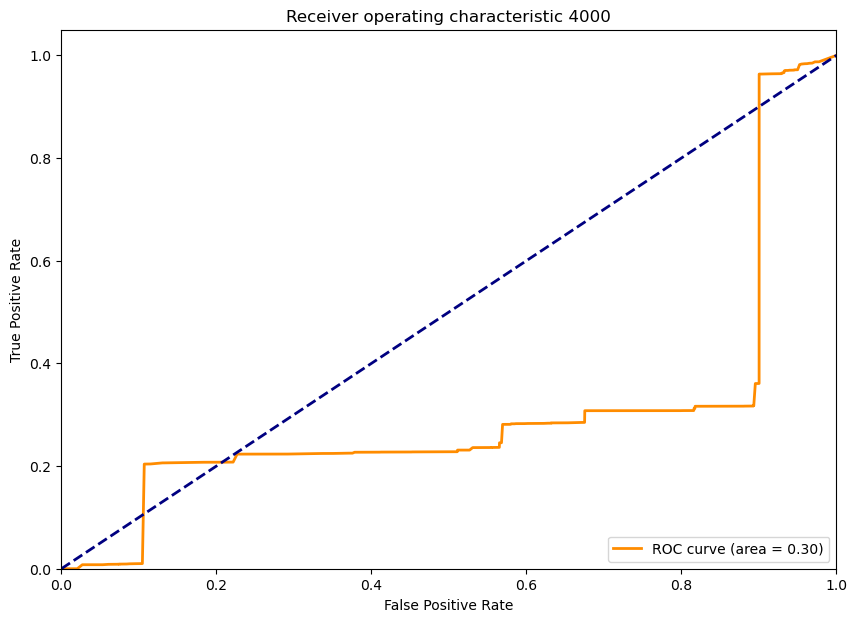

Batch nr  5000
Len res_df:  1331651
Plotting


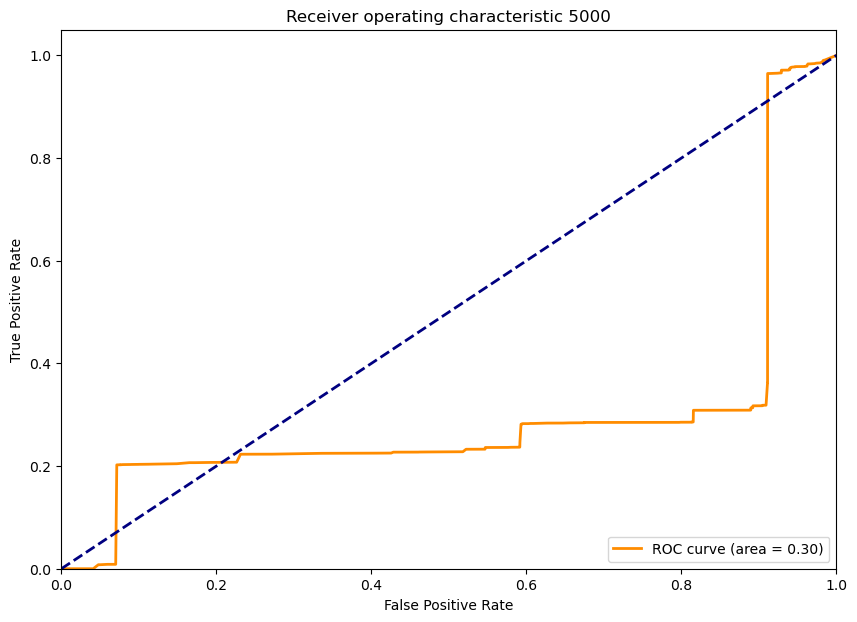

Batch nr  6000
Len res_df:  1331651
Plotting


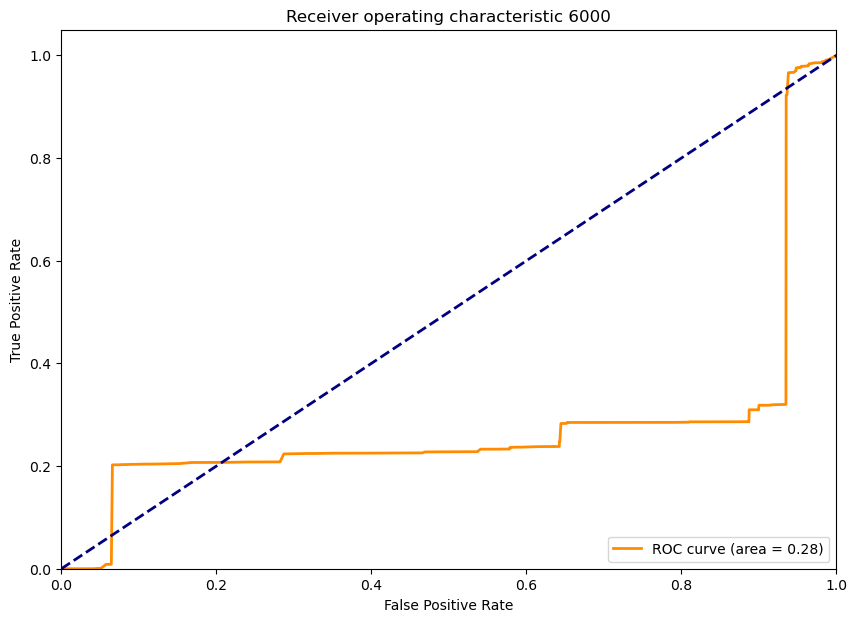

Batch nr  7000
Len res_df:  1331651
Plotting


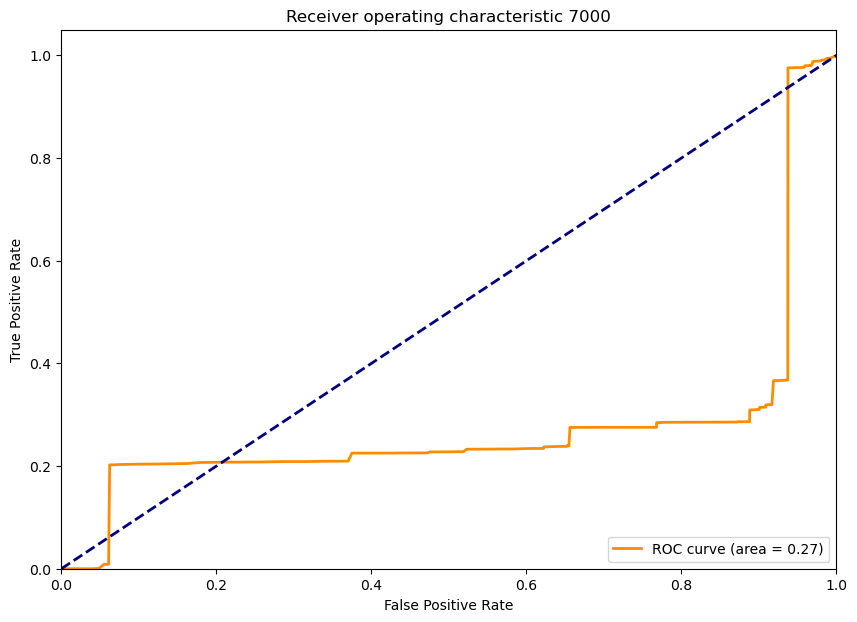

Batch nr  8000
Len res_df:  1331651
Plotting


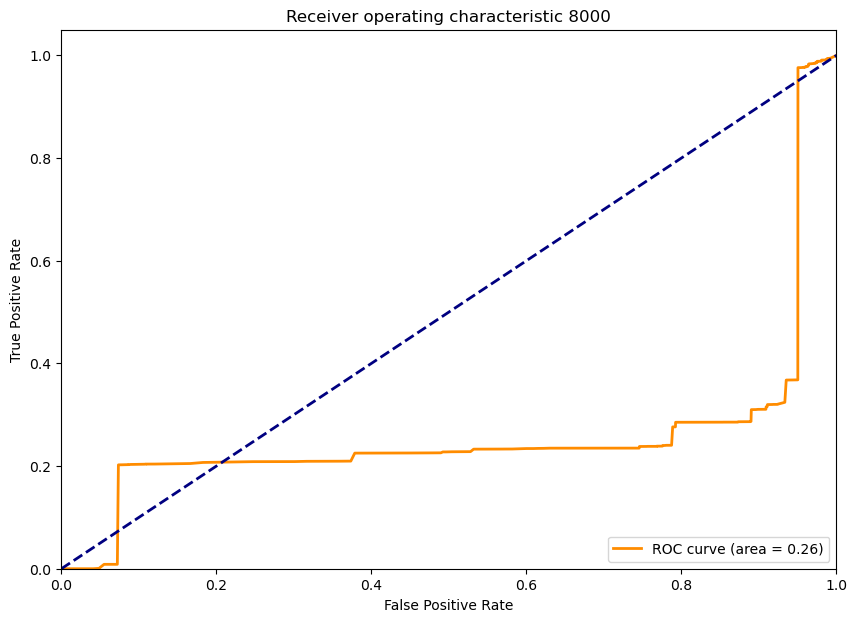

Batch nr  9000
Len res_df:  1331651
Plotting


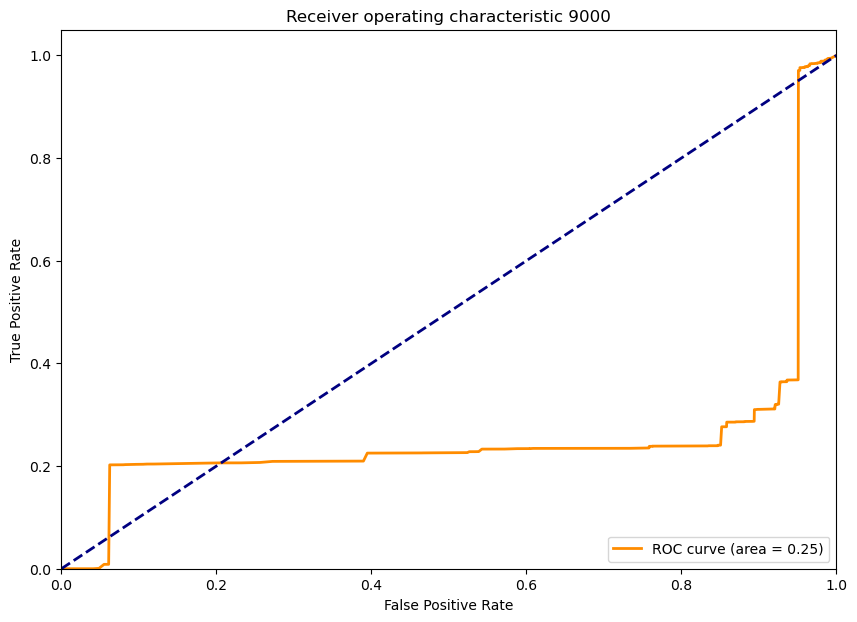

Batch nr  10000
Len res_df:  1331651
Plotting


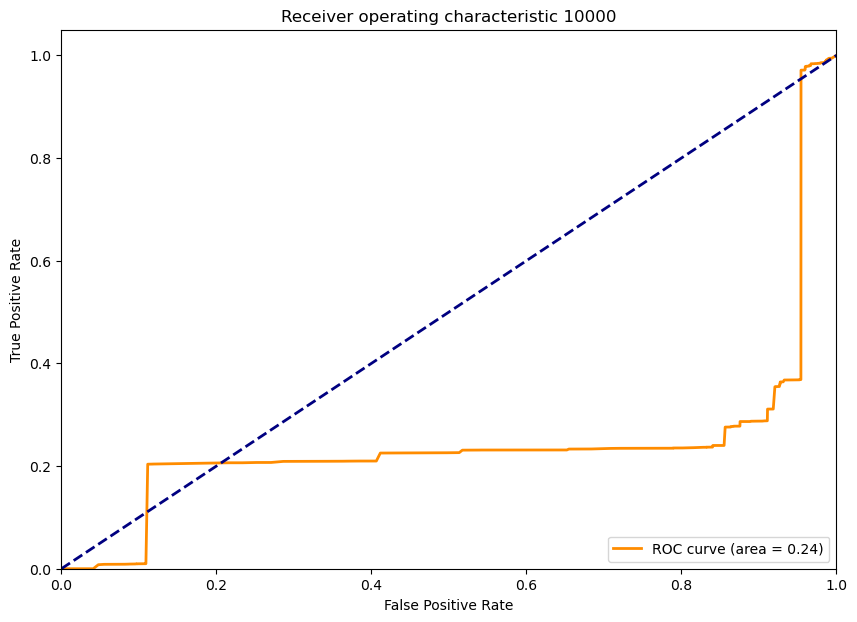

Batch nr  11000
Len res_df:  1331651
Plotting


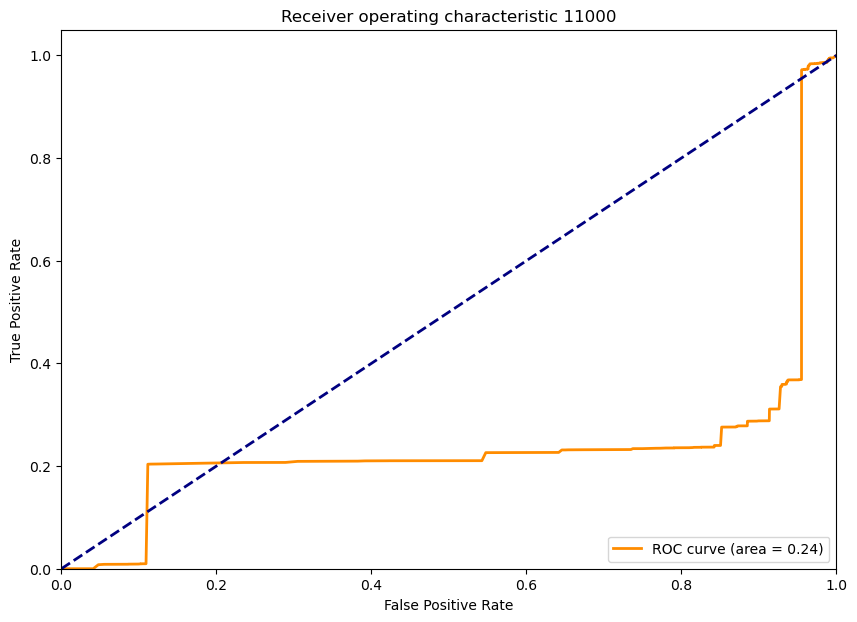

Batch nr  12000
Len res_df:  1331651
Plotting


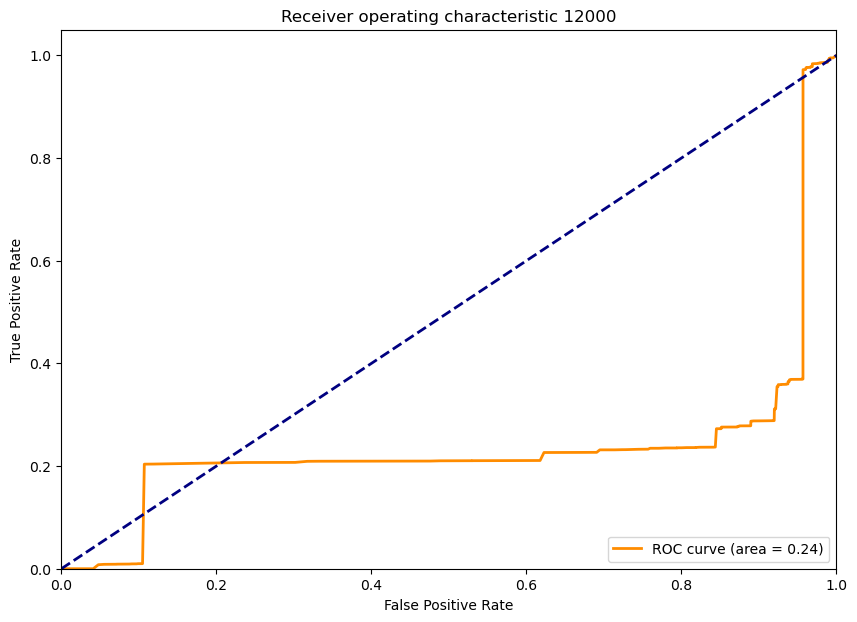

Batch nr  13000
Len res_df:  1331651
Plotting


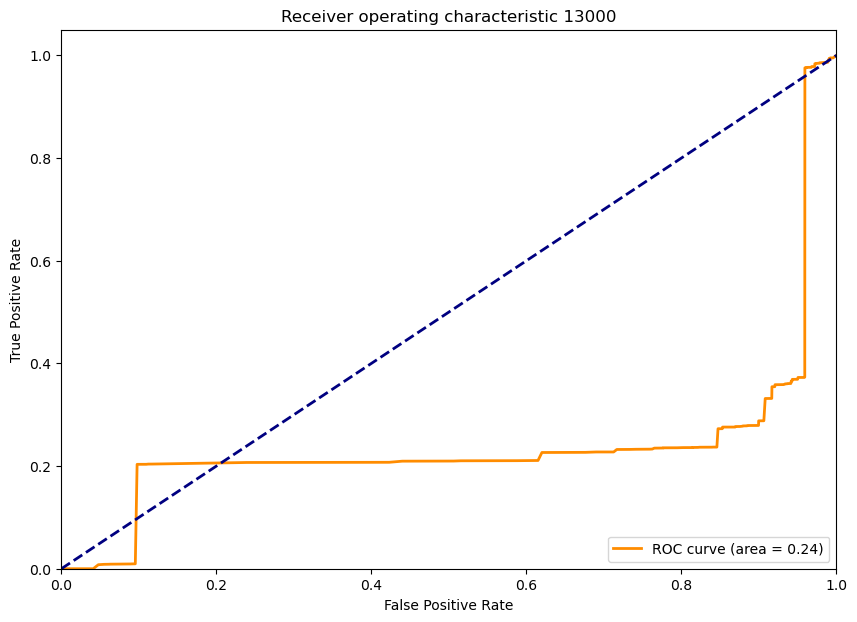

Batch nr  14000
Len res_df:  1331651
Plotting


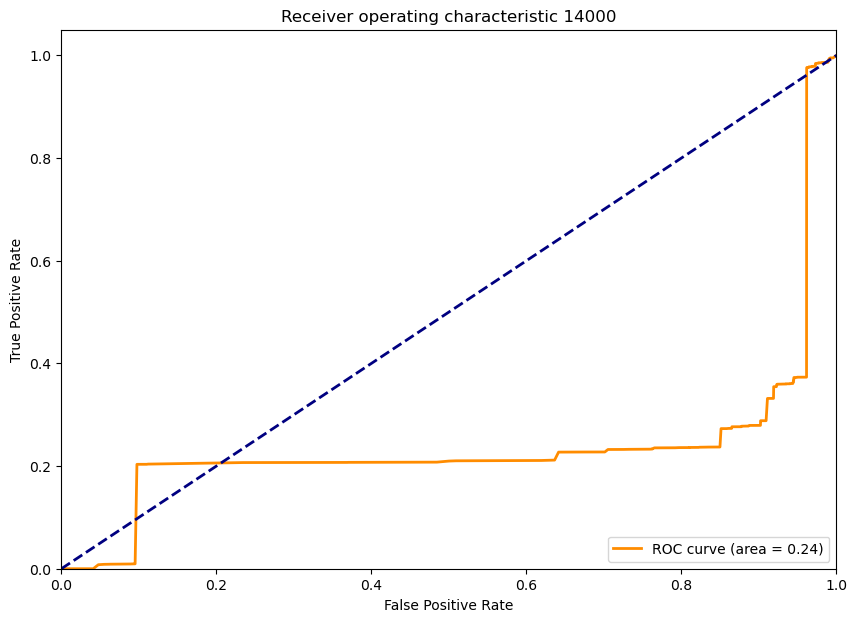

Batch nr  15000
Len res_df:  1331651
Plotting


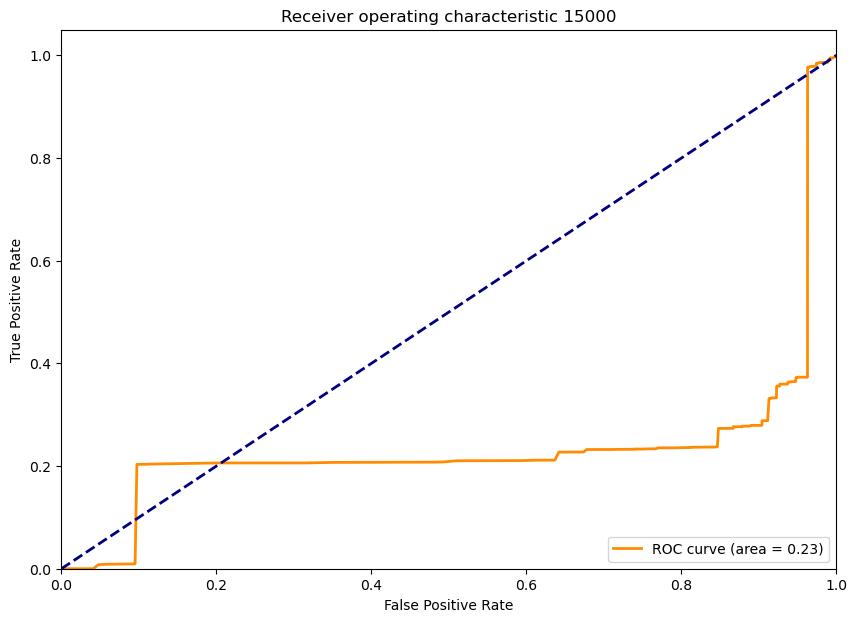

Batch nr  16000
Len res_df:  1331651
Plotting


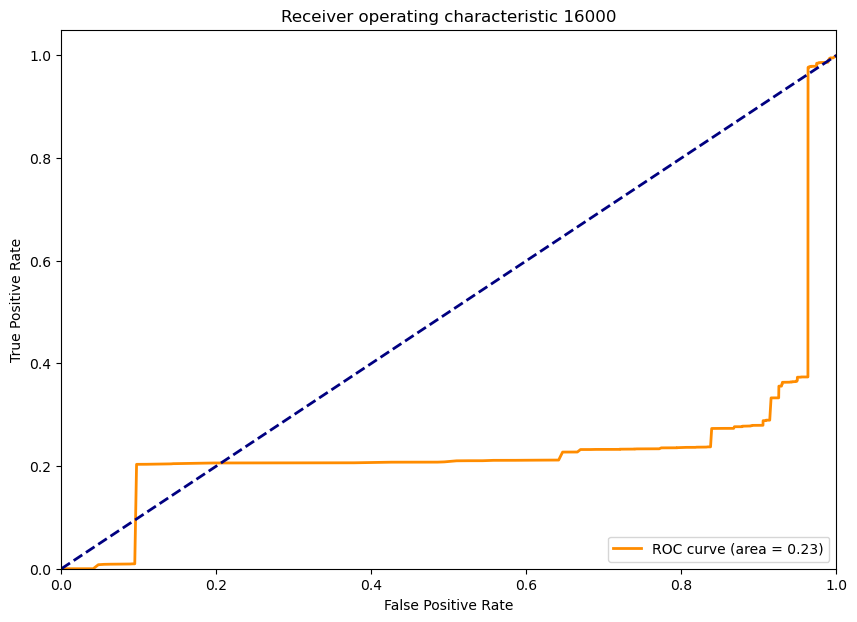

Batch nr  17000
Len res_df:  1331651
Plotting


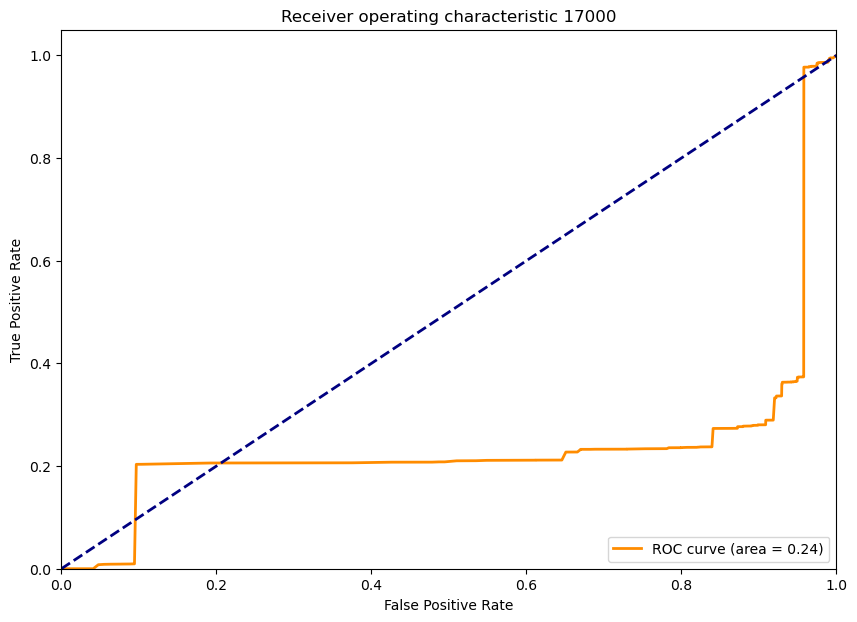

Batch nr  18000
Len res_df:  1331651
Plotting


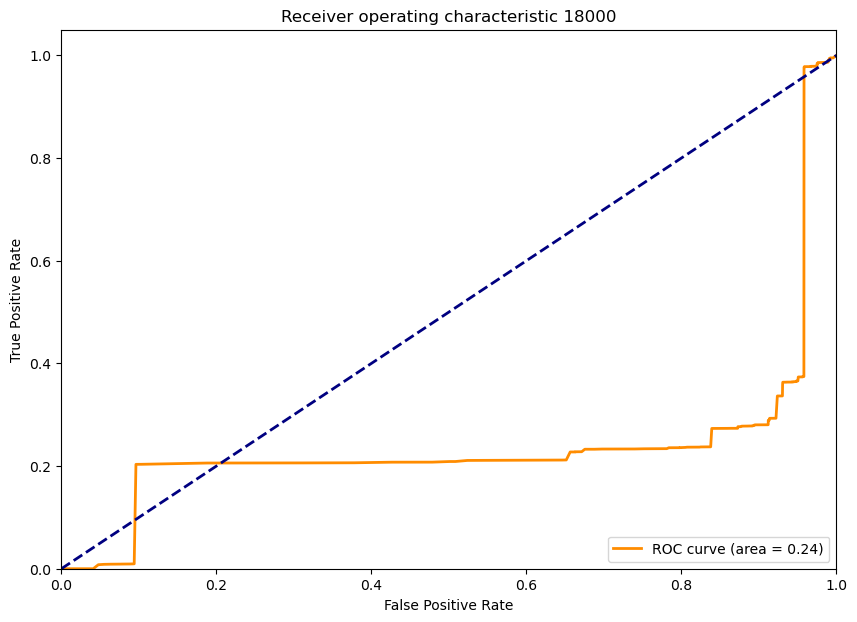

Batch nr  19000
Len res_df:  1331651
Plotting


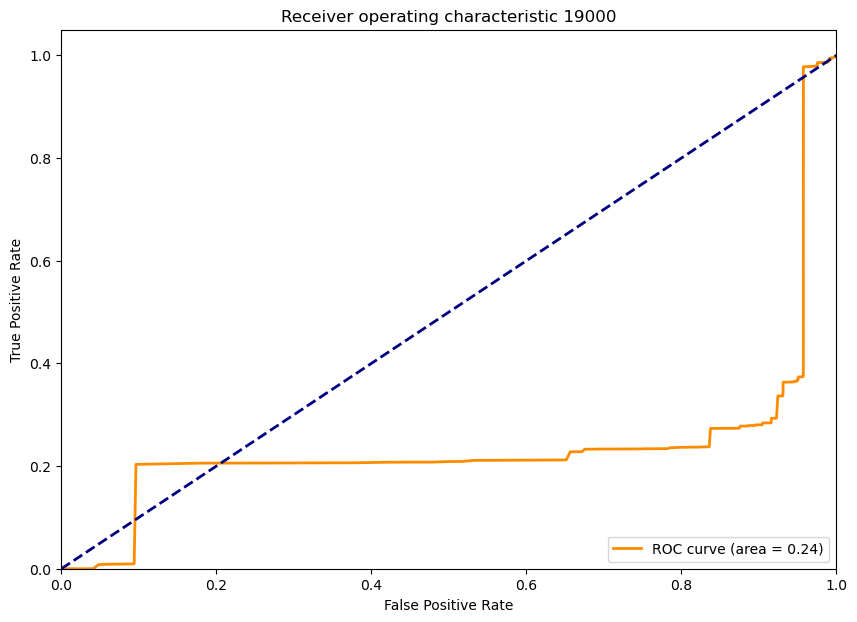

In [6]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

base_dir = "../.."

for i in range(1, 20):
    batch_nr = str(int(i*1000))
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    print("Batch nr ", batch_nr)
    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]
    min_scores = results_df[" min score"]
    
    print("Len res_df: ", len(results_df))

    del results_df
    
    score = -mean_scores

    fpr, tpr, thresholds = roc_curve(labels, score)
    roc_auc = roc_auc_score(labels, score)

    print("Plotting")
    plt.figure(figsize=(10, 7))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        #hue=thresholds,
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
        #cmap="viridis"
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(batch_nr))
    plt.legend(loc="lower right")
    plt.show()

# Performance drops in last batch. What now?

We are curious about the sequences that are predicted falsely. Do they overlap? If not, how are they represented in the model

### Step 1: For each model, find the threshold and plot it into the ROC curve. Will the geometric/harmonic mean work?

Batch nr  1000
Plotting


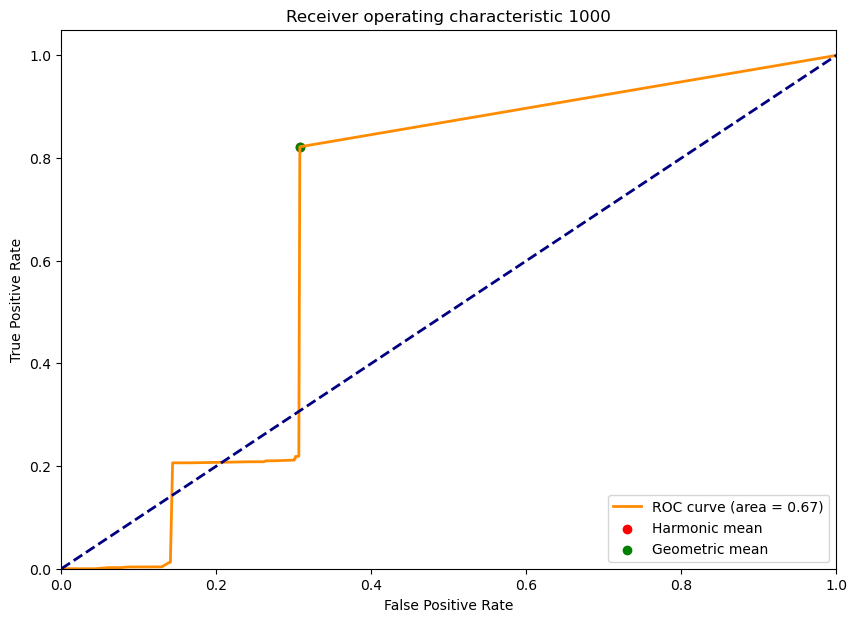

Batch nr  2000
Plotting


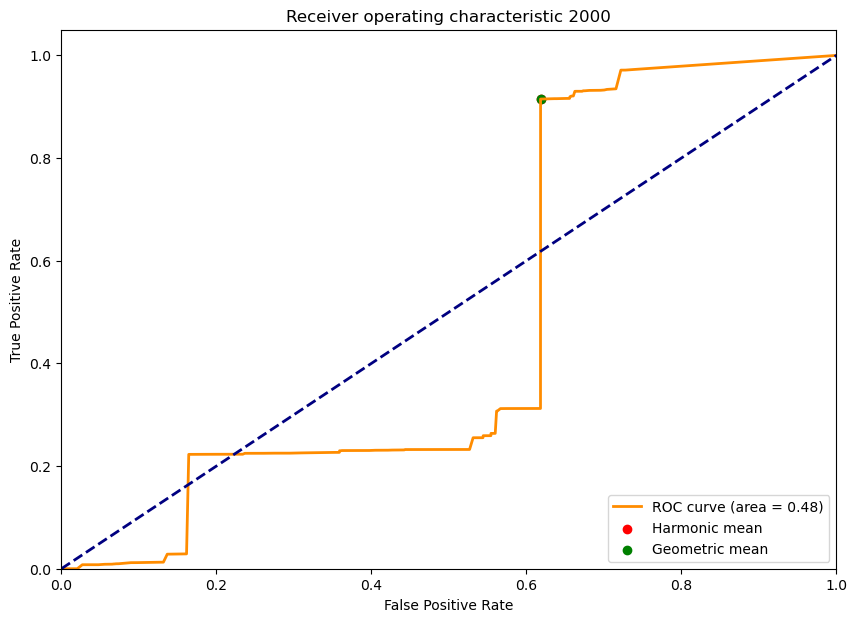

Batch nr  3000
Plotting


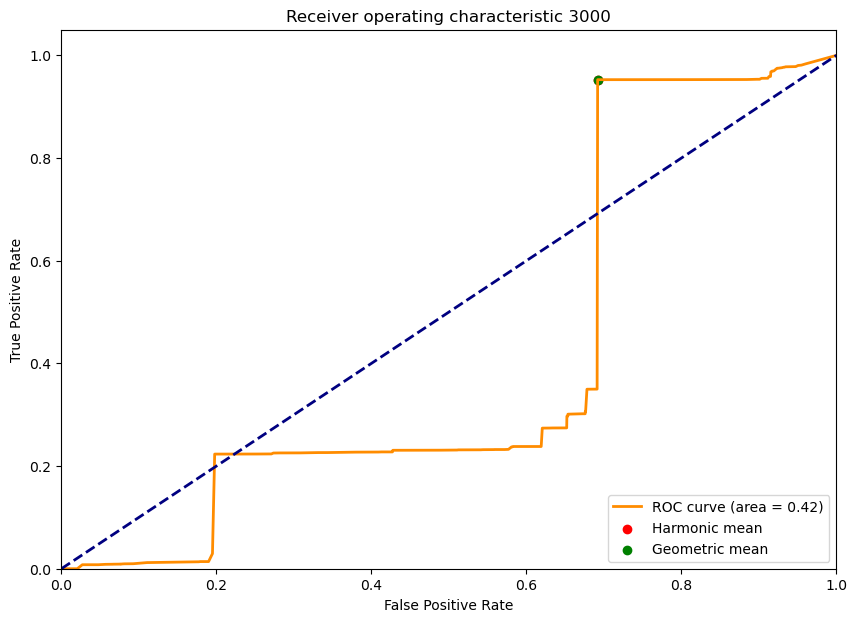

Batch nr  4000
Plotting


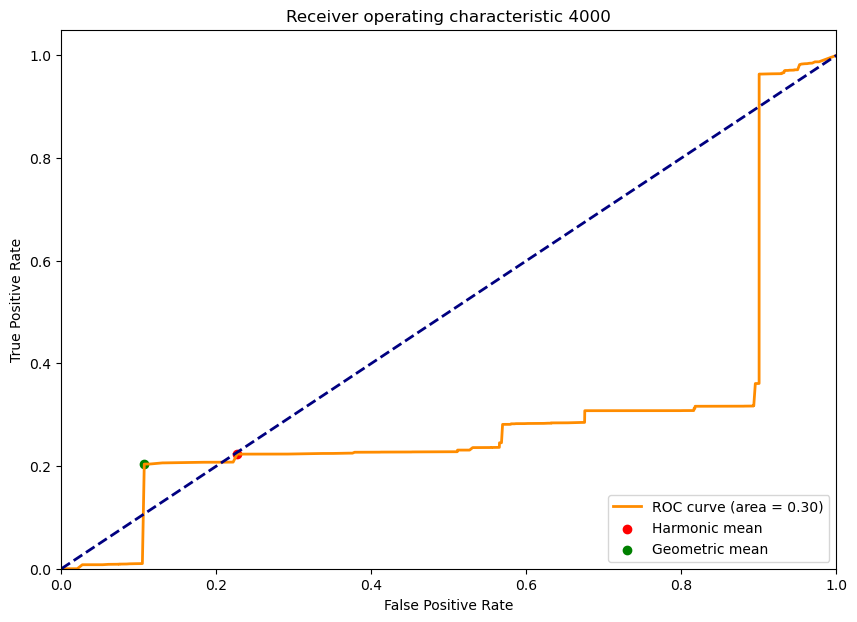

Batch nr  5000
Plotting


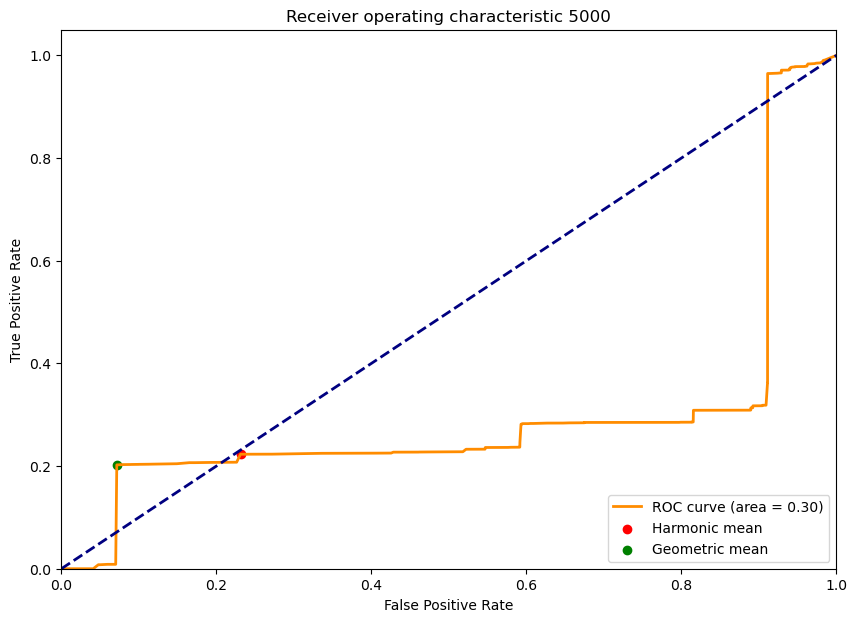

Batch nr  6000
Plotting


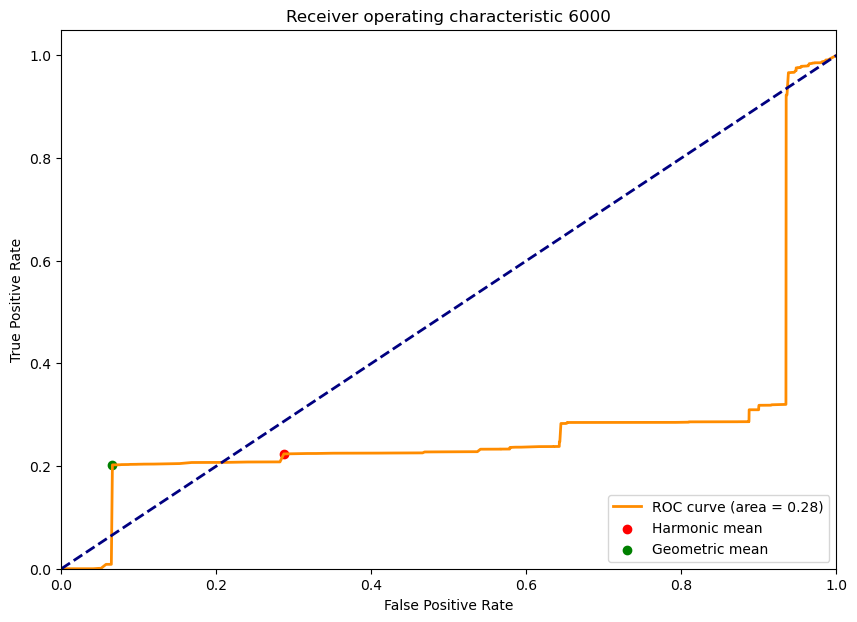

Batch nr  7000
Plotting


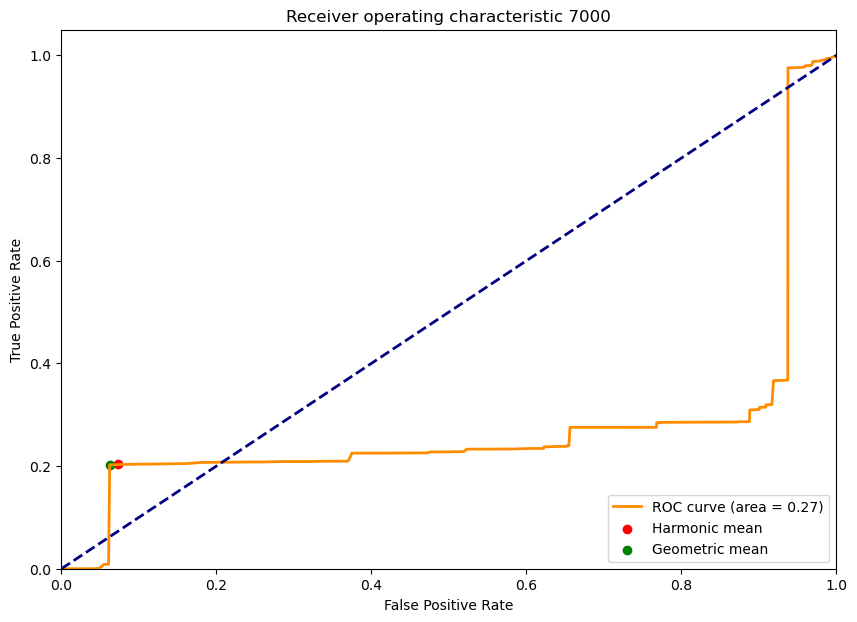

Batch nr  8000
Plotting


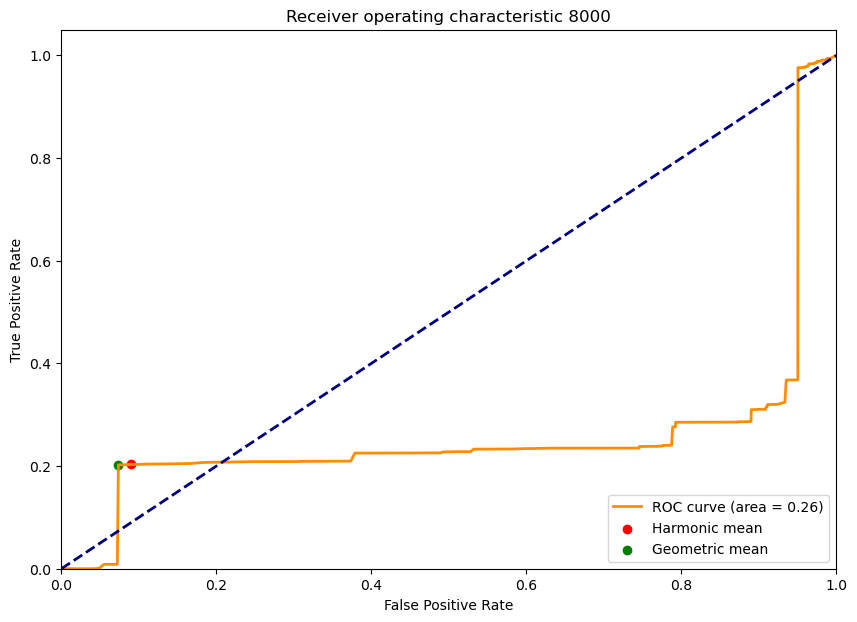

Batch nr  9000
Plotting


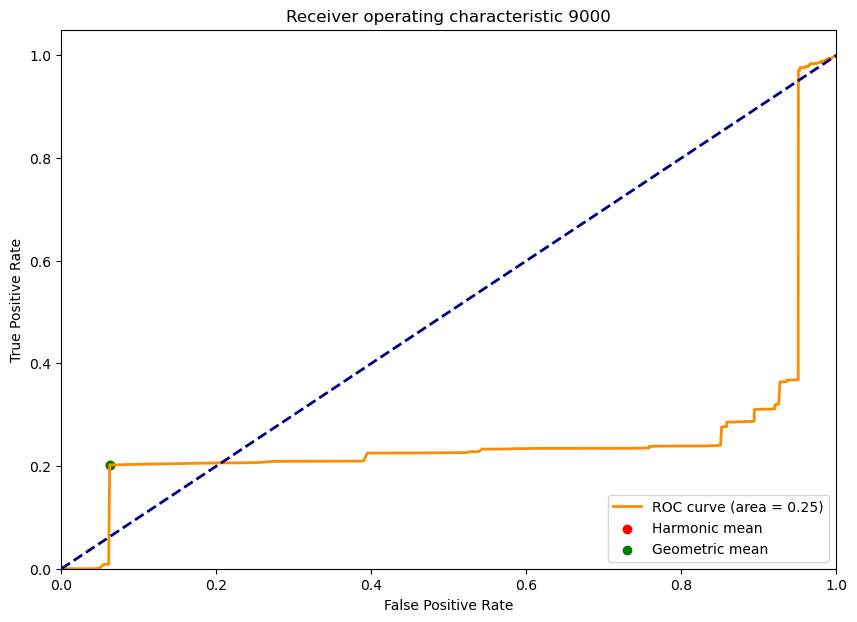

Batch nr  10000
Plotting


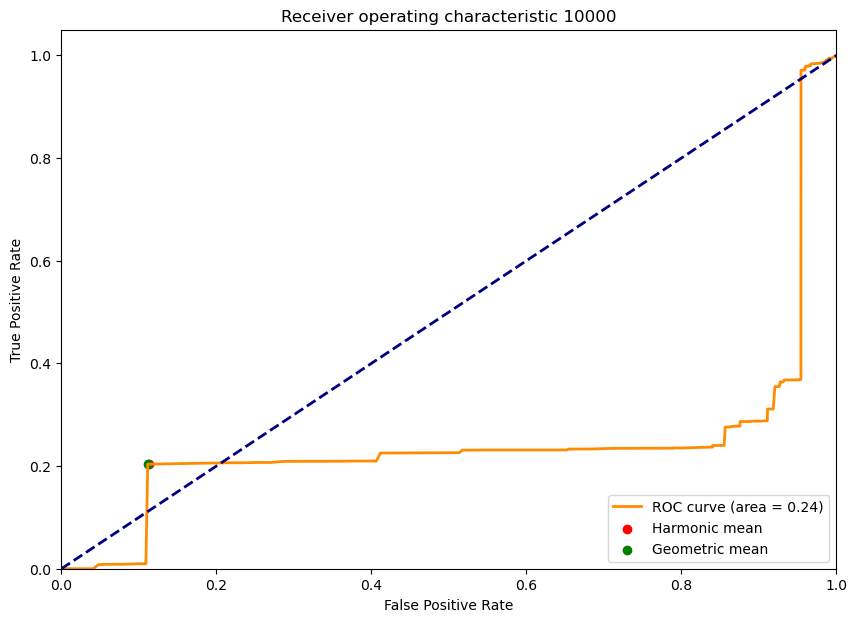

Batch nr  11000
Plotting


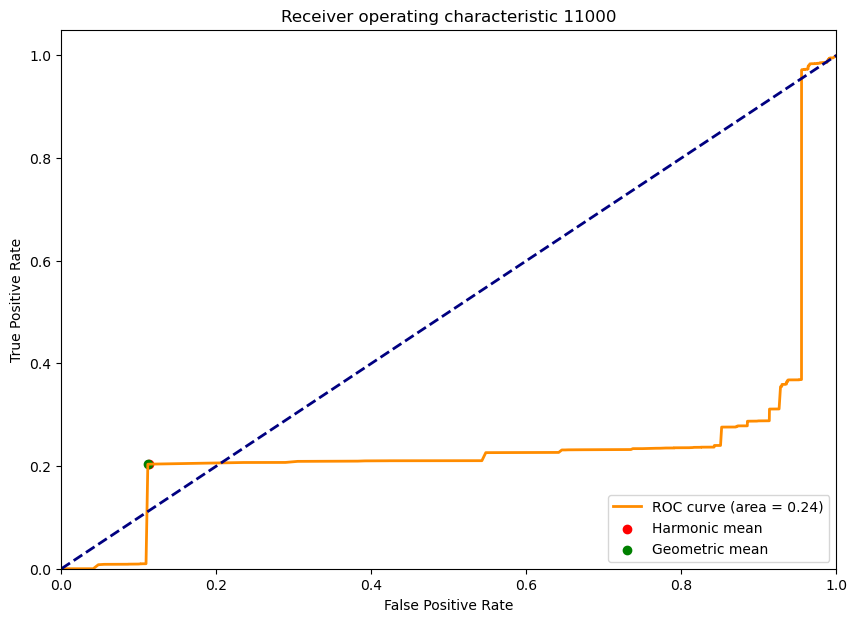

Batch nr  12000
Plotting


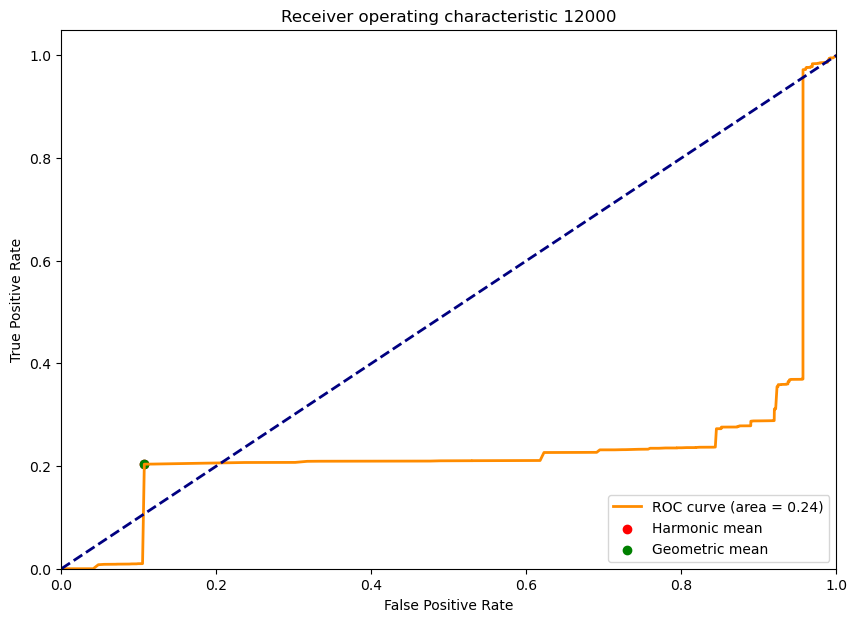

Batch nr  13000
Plotting


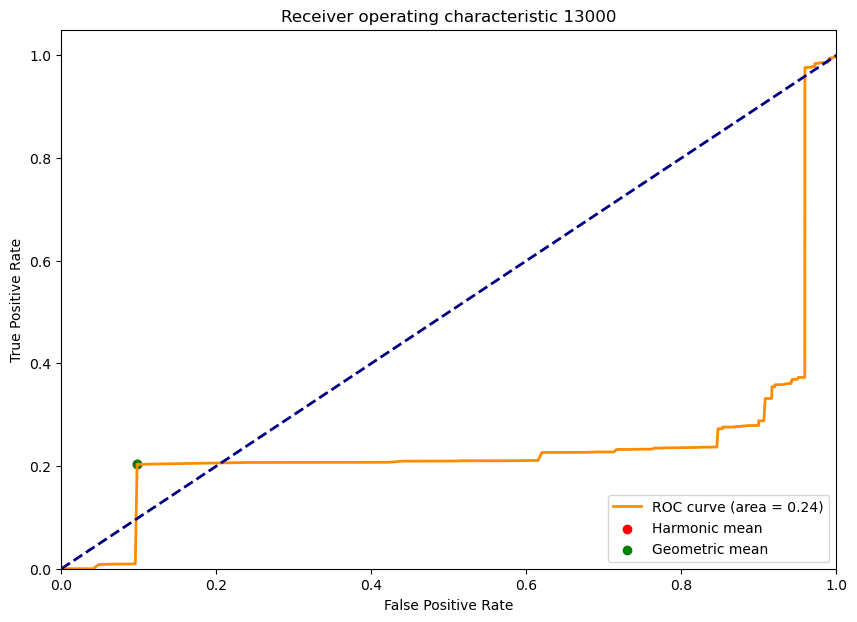

Batch nr  14000
Plotting


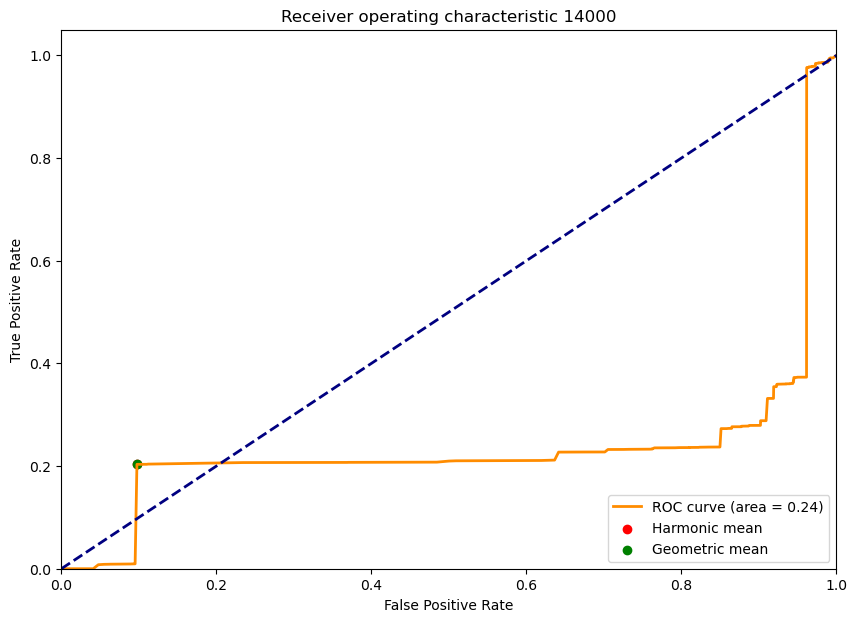

Batch nr  15000
Plotting


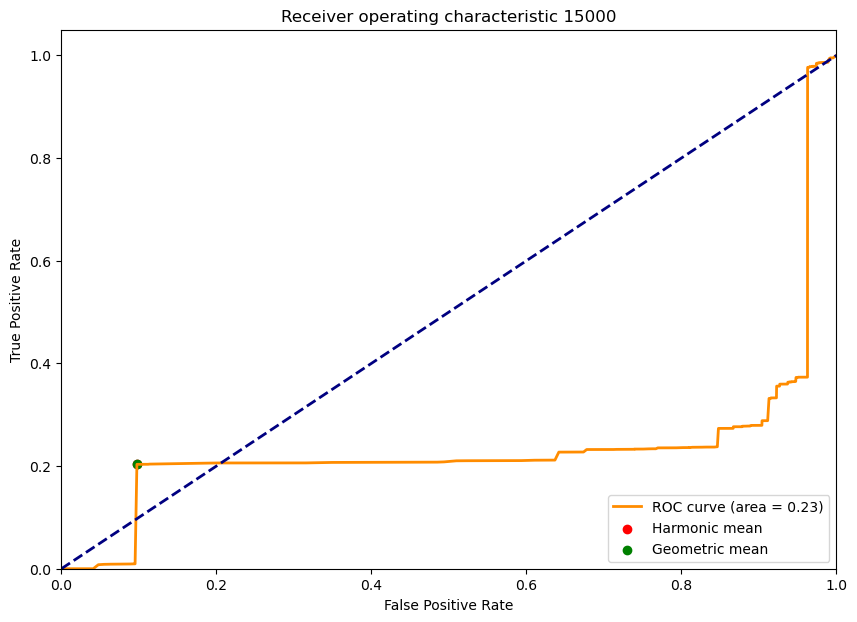

Batch nr  16000
Plotting


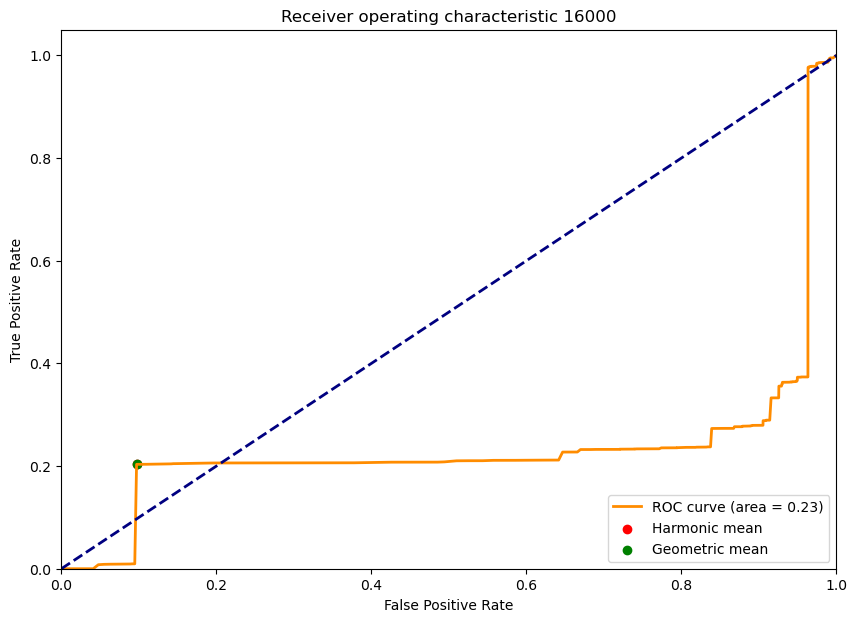

Batch nr  17000
Plotting


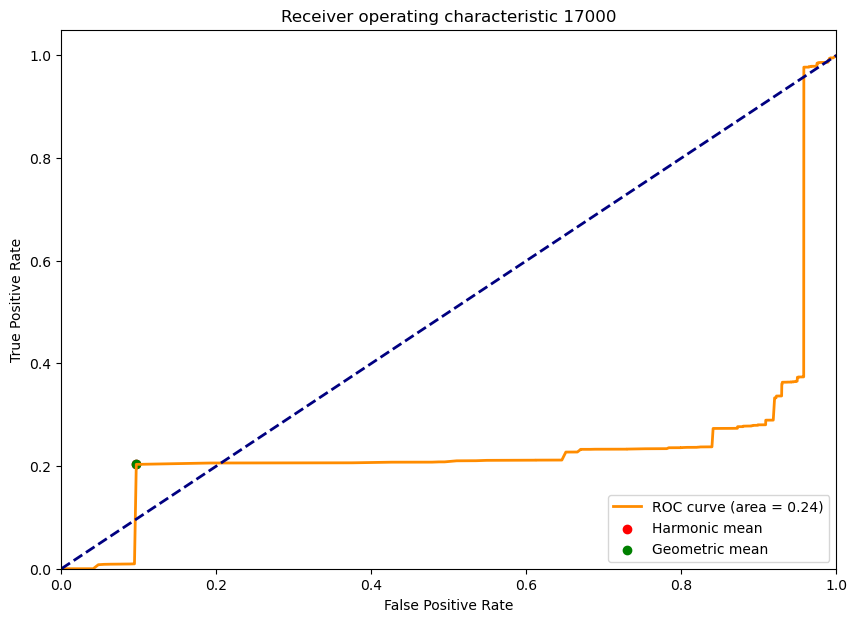

Batch nr  18000
Plotting


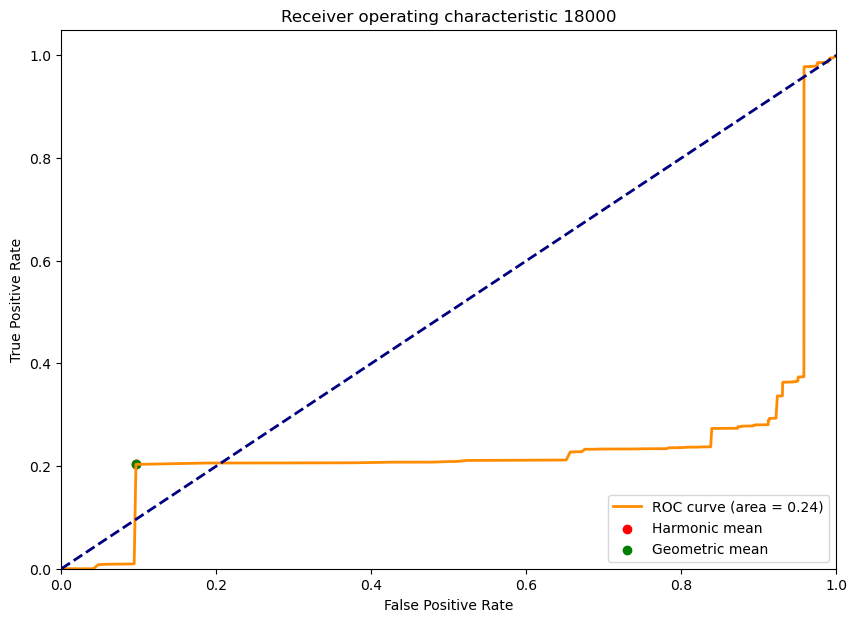

Batch nr  19000
Plotting


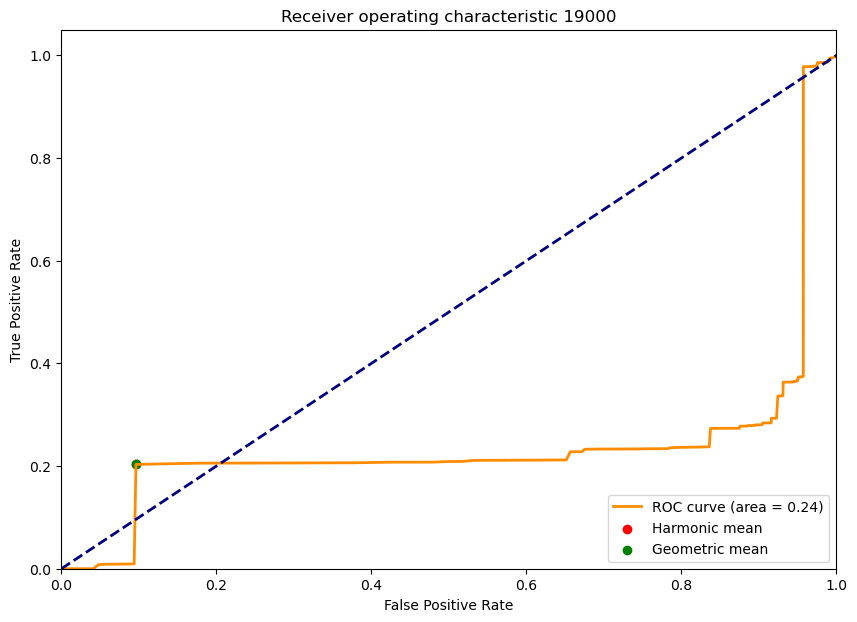

In [7]:
for i in range(1, 20):
    batch_nr = str(int(i*1000))
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    print("Batch nr ", batch_nr)
    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]
    min_scores = results_df[" min score"]

    del results_df

    score = -mean_scores

    fpr, tpr, thresholds = roc_curve(labels, score)
    roc_auc = roc_auc_score(labels, score)
    
    harmonic_mean = 2*(1-fpr)*tpr/((1-fpr)+tpr)
    geometric_mean = np.sqrt((1-fpr)*tpr)

    hm_index = np.argmax(harmonic_mean)
    gm_index = np.argmax(geometric_mean)
    
    print("Plotting")
    plt.figure(figsize=(10, 7))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        #hue=thresholds,
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
        #cmap="viridis"
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    
    plt.scatter([fpr[hm_index]], [tpr[hm_index]], color="red", label="Harmonic mean")
    plt.scatter([fpr[gm_index]], [tpr[gm_index]], color="green", label="Geometric mean")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(batch_nr))
    plt.legend(loc="lower right")
    plt.show()

### Step 2: With the thresholds looking good, we now will determine falsely classified elements via their index

In [9]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

def map_result(x, threshold):
    if x < threshold:
        return 0
    return 1

for i in range(1, 20):
    batch_nr = str(int(i*1000))
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]

    del results_df

    score = mean_scores

    fpr, tpr, thresholds = roc_curve(labels, score)
    
    harmonic_mean = 2*(1-fpr)*tpr/((1-fpr)+tpr)
    geometric_mean = np.sqrt((1-fpr)*tpr)

    hm_index = np.argmax(harmonic_mean)
    gm_index = np.argmax(geometric_mean)
    
    threshold = thresholds[hm_index]
    results_mapped = np.array( list( map(map_result, list(score), [float(threshold)] * len(score) ) ) )
    #print("Batch nr ", batch_nr, ": " balanced_accuracy_score(results_mapped, labels))

In [10]:
false_prediction_indices = dict()
scores = pd.DataFrame()
thresholds = dict()

for i in range(1, 20):
    batch_nr = str(int(i*1000))
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    print("Batch nr ", batch_nr)
    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]

    del results_df

    score = mean_scores
    scores["Batch {}".format(i)] = score

    fpr, tpr, thresholds = roc_curve(labels, score)
    
    harmonic_mean = 2*(1-fpr)*tpr/((1-fpr)+tpr)
    geometric_mean = np.sqrt((1-fpr)*tpr)

    hm_index = np.argmax(harmonic_mean)
    gm_index = np.argmax(geometric_mean)
    
    thresholds[i] = gm_index
    
    threshold = thresholds[hm_index]
    results_mapped = np.array( list( map(map_result, list(score), [float(threshold)] * len(score) ) ) )
    
    false_prediction_indices[i] = set( list(np.where(results_mapped != labels)[0].reshape(-1)) )
print(len(false_prediction_indices))
print(len(false_prediction_indices[1]))

Batch nr  1000
Batch nr  2000
Batch nr  3000
Batch nr  4000
Batch nr  5000
Batch nr  6000
Batch nr  7000
Batch nr  8000
Batch nr  9000
Batch nr  10000
Batch nr  11000
Batch nr  12000
Batch nr  13000
Batch nr  14000
Batch nr  15000
Batch nr  16000
Batch nr  17000
Batch nr  18000
Batch nr  19000
19
396710


In [11]:
scores["label"] = labels
scores.label.value_counts(), scores.label.dtype

(0    1231527
 1     100124
 Name: label, dtype: int64,
 dtype('int64'))

In [12]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


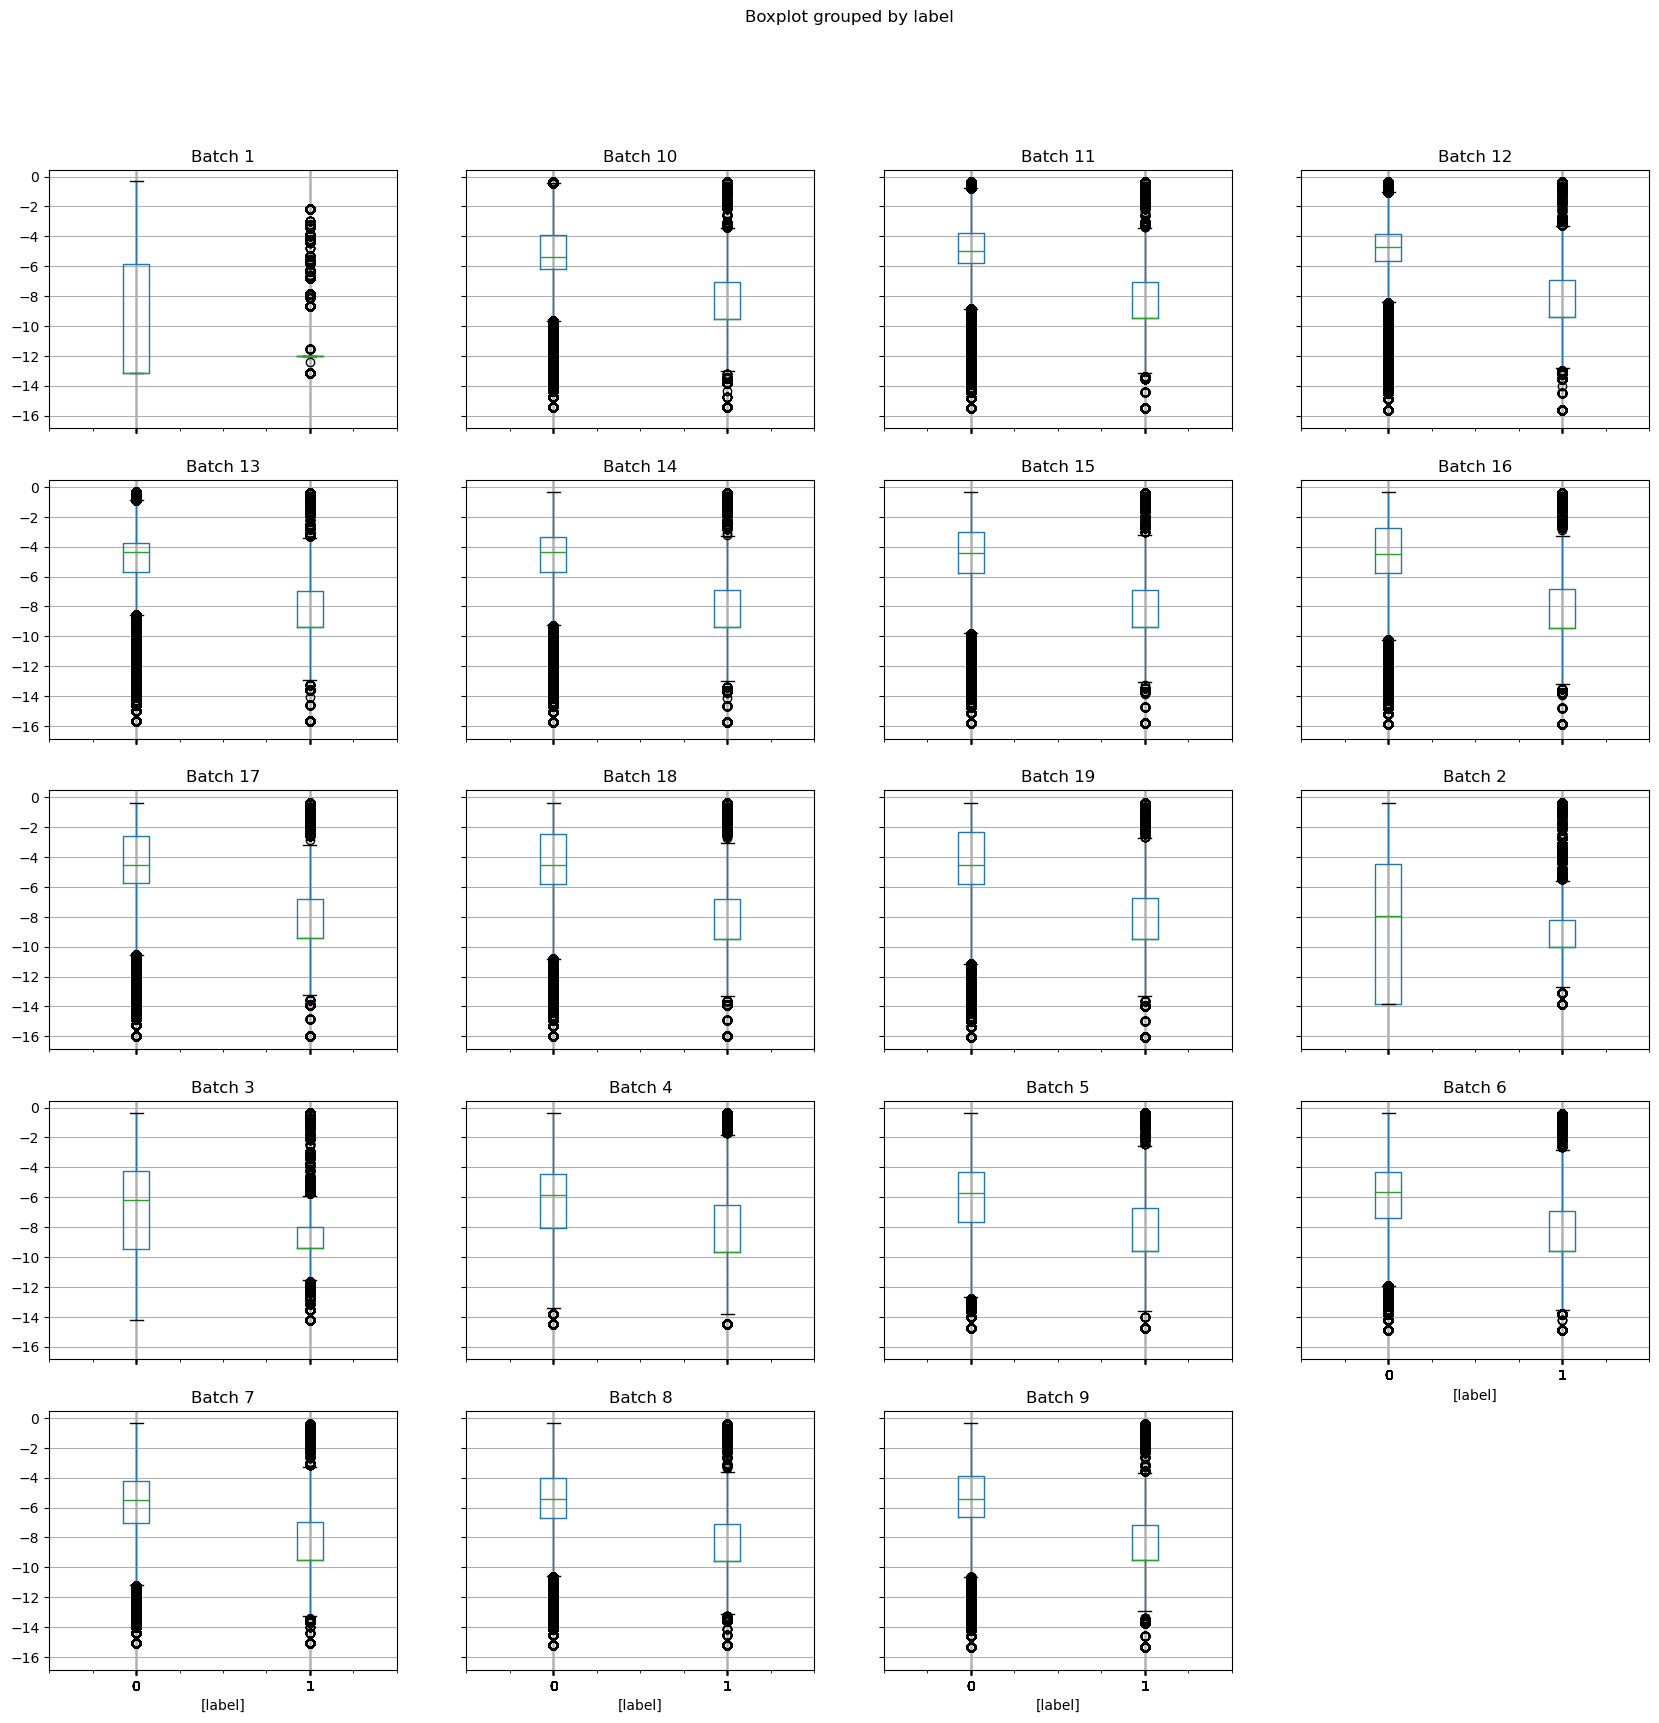

In [13]:
#sns.boxplot(data=scores, hue="label")
_ = scores.boxplot(by="label", figsize=(20, 20))
plt.savefig("sicco.png")

### Step 3: Looks like malign sequences are more prevalent than benign ones. Check this hypothesis

In [ ]:
malign_indices = np.where(labels==1)[0]
len(malign_indices)

In [ ]:
malign_sequences = set()
